<a href="https://colab.research.google.com/github/mugalan/vibration-analysis/blob/main/answers-to-selected-assignments/Mid_Semester_Assessment_Answers_ME327_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from numpy import linalg
import scipy as sp
import math
from scipy.integrate import odeint
#from matplotlib import animation, rc
from IPython.display import HTML

import plotly.graph_objects as go
from sympy import *
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

#Problem formulation

An apparatus consists of an pinned-pinned axially loaded beam with axial load $P$ and Length $L$. A motor of negligible mass is mounted on the beam at $L/2$. The properties of the beam are: $a=1\times10^{-2}\, m$; $b=5\times10^{-3} \,m$; $L=1\, m$. There are three other rotary machines that operate in close proximity of the apparatus. An accelerometer is mounted on the motor at $L/2$. Two sets of data are collected, at a sampling frequency of $5\,kHz$, for two operating conditions of the motor that cause large amplitude vibrations of the beam. For the lower frequency motion the maximimum amplitude of vibration is measured to be about $4.3\,mm$.


Assume that the vibrations of the other nearby devices are transmitted through the base of the axially loaded beam apparatus and that the structure of the axially loaded beam apparatus has a very high degree of flexural rigidity.

Answer the followings:

* Provide a schematic of the system clealry indicating the measurements and the disturbances acting on the system.
* Derive an approximate minimum dimensional model for the system that can capture the measured behaviour.
* Implement a filter to filter out the base excitations.
* Estimate the damping constant $C$ and the maximum amplitude of the forcing due to motor.
* Estimate the Young's modulas and the axial load on the beam in terms of the density of the beam.
* Estimate the displacement behavior of the system for the duration of the measurment
* Estimate the acceleration and plot against the measured acceleration
* Discuss the accuracy of your estimates.

The measurement data can be accessed from:
https://github.com/mugalan/vibration-analysis/blob/main/assignments/ME327_2025_Mid_Assesment_data.csv

You may assume that the pinned-pinned axially loaded beam with dampingis sufficiently accurately described by the solutions of the partial differential equation given by

\begin{align}
{{\partial^2 y} \over {\partial t^2}} + C{{\partial y} \over {\partial t}}+\frac{EI} {\rho A}{{\partial^4 y} \over {\partial x^4}}+\frac{P}{\rho A} {{\partial^2 y} \over {\partial x^2}}&=q(t,x)
\end{align}

where $y$ is the transverse displacement of the beam with respect to the mid line, $C$ is the damping coefficient of the system, $P$ is the axial compressive force, $\rho$ is the density of the material of the beam, and $E$ is the modulus of rigidity, $I$ is the cross sectional moment of inertia, and $A$ is the cross sectional area of the uniform beam. In this section we will consider the case where the axial load is a constant.

##Answer

## Shcematic of the system - [5%]

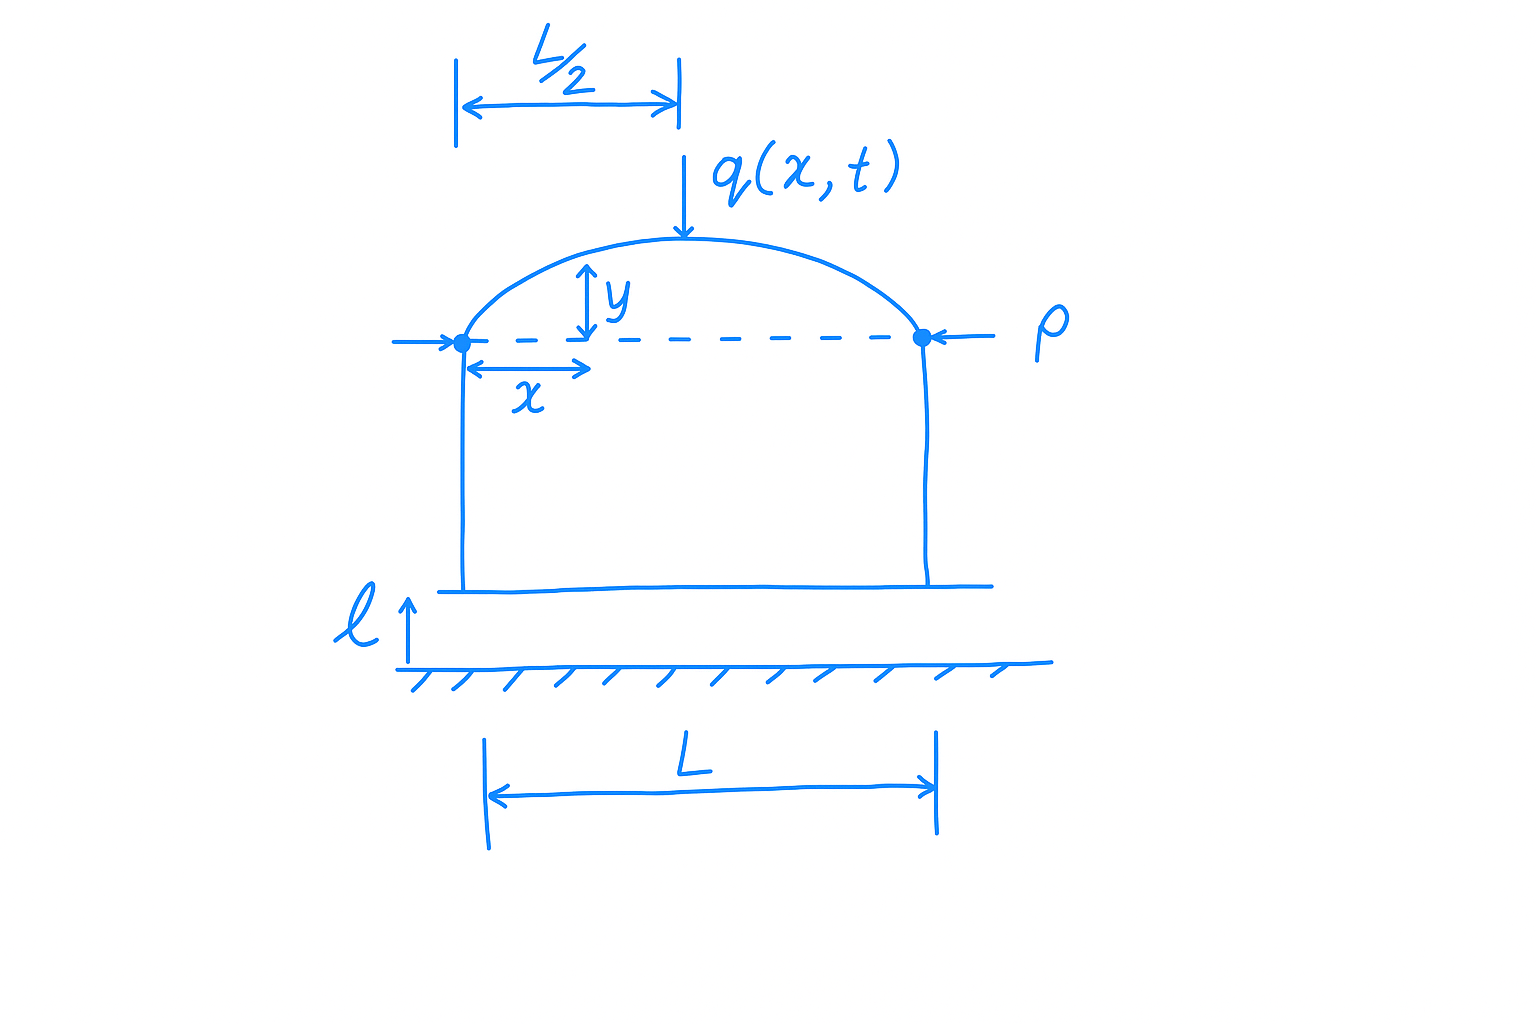

Here $l(t)$ captures the base excitation.

##Mathematical Model - [25%]

It can be shown that, if the displacements are small then the motion of the system is sufficiently accurately described by the solutions of the partial differential equation given by

\begin{align}
{{\partial^2 y} \over {\partial t^2}} + C{{\partial y} \over {\partial t}}+\frac{EI} {\rho A}{{\partial^4 y} \over {\partial x^4}}+\frac{P}{\rho A} {{\partial^2 y} \over {\partial x^2}}&=q(t,x)
\end{align}

where $y$ is the transverse displacement of the beam with respect to the mid line, $C$ is the damping coefficient of the system, $P$ is the axial compressive force, $\rho$ is the density of the material of the beam, and $E$ is the modulus of rigidity, $I$ is the cross sectional moment of inertia, and $A$ is the cross sectional area of the uniform beam. In this section we will consider the case where the axial load is a constant.

Accounting for the effect of the nearby rotary machines, we will approximate the base excitation of the apparatus, $l(t)$, by
\begin{align}
l(t)=\epsilon(\cos{2\pi f_1 t}+\cos{2\pi f_2 t}+\cos{2\pi f_3 t})
\end{align}
Then the accelermometer reading is
\begin{align}
a(t)&=\dfrac{\partial^2 y}{\partial t^2}+\ddot{l}(t)+\nu_t
\end{align}
where $\nu_t\sim \mathfrak{N}(0,\sigma)$ is measurement white noise.

Then
\begin{align}
q(t,x)&=f_0\cos{(\omega t)}\delta\left(x-\frac{L}{2}\right)-\ddot{l}-C\dot{l}
\end{align}
Compared to $f_0$ we will asume that $\ddot{l}$ and $\dot{l}$ is small and hence that
\begin{align}
q(t,x)&\approx f_0\cos{(\omega t)}\delta\left(x-\frac{L}{2}\right)
\end{align}

\begin{align}
\ddot{z}_k+2\zeta_k\omega_k\dot{z}_k+\omega_k^2z_k&=\langle\langle\psi_k(x),q(x,t)\rangle\rangle
\end{align}
where $\zeta_k=\frac{C}{2\omega_k}$,  and
\begin{align}
\omega_k &= \sqrt{ \frac{k^2 \pi^2}{\rho A L^2} \left( \frac{E I k^2 \pi^2}{L^2} - P \right) }
\end{align}

\begin{align}
y(t, x) = \sum_{k=1}^\infty \chi_{2k-1}(\omega) \cos\left(\omega t + \phi_{2k-1}(\omega)\right) \psi_{2k-1}(x)
\end{align}
\begin{align}
\omega_k &= \sqrt{ \frac{k^2 \pi^2}{\rho A L^2} \left( \frac{E I k^2 \pi^2}{L^2} - P \right)}\\
\chi_k(\omega) & = \frac{2 f_0}{L} \cdot \left|\frac{\sin(k \pi / 2)}{ \sqrt{(\omega_k^2 - \omega^2)^2+4\zeta_k^2\omega^2\omega_k^2}}\right|\\
\phi_k(\omega) &=\arctan{\left(\frac{2\zeta_k\omega\omega_k}{\omega_k^2 - \omega^2}\right)}
\end{align}

From the damped ocillators we find that:
$\chi(\omega)$ is maximum when
\begin{align}
\omega_{k_r}=\omega_k\sqrt{1-2\zeta_k^2},
\end{align}
and that the maximum amplitude of vibration is given by
\begin{align}
{y_{ss}}_{max}=\frac{f_0\sin(k\pi/2)}{L\zeta_k\omega_k^2\sqrt{1-\zeta_k^2}}.
\end{align}


\begin{align}
y(t, x) \approx \chi_1(\omega) \cos\left(\omega t + \phi_1(\omega)\right) \sin{\left(\frac{\pi x}{L}\right)}+\chi_3(\omega) \cos\left(\omega t + \phi_3(\omega)\right) \sin{\left(\frac{3\pi x}{L}\right)}
\end{align}
\begin{align}
a(t) \approx -\omega^2\left(\chi_1(\omega) \cos\left(\omega t + \phi_1(\omega)\right)-\chi_3(\omega) \cos\left(\omega t + \phi_3(\omega)\right)\right)+\ddot{l}(t)+\nu_t
\end{align}

Hence for the filtered signal
\begin{align}
{a_{ss}}_{k_{max}}=\frac{f_0\sin(k\pi/2)}{L\zeta_k\sqrt{1-\zeta_k^2}}.
\end{align}

Near resonance. That is when $\omega \approx \omega_k$

## Implement a filter to filter out the base excitations - [10%]

In [2]:
df=pd.read_csv('ME327_2025_Mid_Assesment_data.csv')

In [8]:
# Perform Fourier Transform on a_1

def plot_fft(fs,a_vals):
    ft_a1 = np.fft.fft(a_vals)
    frequencies_a1 = np.fft.fftfreq(len(a_vals), d=1/fs)

    # Get positive frequencies and corresponding magnitudes
    positive_freqs_a1 = frequencies_a1 > 0
    freqs_plot_a1 = frequencies_a1[positive_freqs_a1]
    magnitude_plot_a1 = np.abs(ft_a1[positive_freqs_a1]) / len(a_vals)

    # Plot using Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=freqs_plot_a1,
        y=magnitude_plot_a1,
        mode='lines',
        name='FFT Magnitude of a'
    ))

    fig.update_layout(
        title="Frequency Spectrum of a",
        xaxis_title="Frequency (Hz)",
        yaxis_title="Magnitude",
        template="plotly_white"
    )

    fig.show()

###a_1 data

In [9]:
a_vals = df['a_1'].values
fs = 5000
plot_fft(fs,a_vals)

In [13]:
omega1=2*np.pi*7

### a_2 data

In [10]:
a_vals = df['a_2'].values
fs = 5000
plot_fft(fs,a_vals)

In [14]:
omega3=2*np.pi*106

###Discussion

Both accelerometer readings are seen to be influenced by the same three frequency component signals of frequency, 150 Hz, 160 Hz, and 170 Hz. Thus we can assume that these are the ones that correspond to the nearby excitations.

### Filetering the base excitations by using an ideal software filter

In [11]:
import numpy as np
import plotly.graph_objects as go

# Assume a_vals (raw signal) and fs (sampling frequency) are already defined
def low_pass_ideal_filter(fs,a_vals):
    time = np.arange(len(a_vals)) / fs

    # FFT and low-pass filter
    ft = np.fft.fft(a_vals)
    frequencies = np.fft.fftfreq(len(a_vals), d=1/fs)
    filter_mask = np.abs(frequencies) < 140
    ft_filtered = ft * filter_mask
    filtered_signal = np.fft.ifft(ft_filtered).real

    # Time-domain plot: Original and Filtered Signal
    fig_combined = go.Figure()
    fig_combined.add_trace(go.Scatter(
        x=time,
        y=a_vals,
        mode='lines',
        name='Original Signal',
        line=dict(color='red', width=1)
    ))
    fig_combined.add_trace(go.Scatter(
        x=time,
        y=filtered_signal,
        mode='lines',
        name='Filtered Signal',
        line=dict(color='blue', width=2)
    ))

    fig_combined.update_layout(
        title="Original and Filtered Time-Domain Signals",
        xaxis_title="Time (s)",
        yaxis_title="Amplitude",
        template="plotly_white",
        legend=dict(x=0.01, y=0.99)
    )

    fig_combined.show()

#### Filtered a_1

In [12]:
a_vals = df['a_1'].values
fs = 5000
low_pass_ideal_filter(fs,a_vals)

#### Filtered a_2

In [15]:
a_vals = df['a_2'].values
fs = 5000
low_pass_ideal_filter(fs,a_vals)

## Estimate the damping constant  𝐶  and the maximum amplitude of the forcing due to motor - [20%]

From the theory above we see that since
\begin{align}
\omega_{k_r}=\omega_k\sqrt{1-2\zeta_k^2},
\end{align}
and that the maximum amplitude of vibration is given by
\begin{align}
{y_{ss}}_{k_{max}}&=\frac{f_0\sin(k\pi/2)}{L\zeta_k\omega_k^2\sqrt{1-\zeta_k^2}}\\
{a_{ss}}_{k_{max}}&=\frac{f_0\sin(k\pi/2)}{L\zeta_k\sqrt{1-\zeta_k^2}}.
\end{align}

To solve for the many unknowns we will make the following physically plausible assumptions:
\begin{align*}
\zeta_k \ll 1 \Rightarrow \sqrt{1 - \zeta_k^2} \approx 1,
\end{align*}

Then we have

\begin{align}
\omega_{k_r}\approx\omega_k,
\end{align}
and that the maximum amplitude of vibration is given by
\begin{align}
{y_{ss}}_{k_{max}}&\approx\frac{f_0\sin(k\pi/2)}{L\omega_k^2\zeta_k}=\frac{2f_0\sin(k\pi/2)}{\omega_kLC}\\
{a_{ss}}_{k_{max}}&\approx\frac{f_0\sin(k\pi/2)}{L\zeta_k}=\frac{2\omega_kf_0\sin(k\pi/2)}{LC}
\end{align}
Here we have used the fact that
\begin{align}
C=2\zeta_k\omega_k
\end{align}

####Measurments

In [16]:
y1_max=0.0043
a1_max=12
a3_max=140

####Calculations

From these we have
\begin{align}
\frac{2f_0}{LC}&=\omega_1\times 0.0043\\
\frac{2f_0}{LC}&=12/\omega_1\\
\frac{2f_0}{LC}&=140/\omega_3\\
\end{align}

In [17]:
print(0.0043*omega1)
print(12/omega1)
print(140/omega3)

0.18912387774610553
0.272837045300392
0.21020464181948442


In [18]:
(0.0043*omega1+12/omega1+140/omega3)/3

0.22405518828866064

Lets get the average of the above three for $2f_0/(LC)\approx0.22$. **From this we see that $f_0$ and $C$ can not be inferrred independetly.** Since $L=1$ we have

\begin{align}
C\approx f_0/0.11
\end{align}

For the rest of the computations we will assume that $f_0=1$ and hence $C\approx 1/0.11$


In [19]:
f_0=1
C=f_0/0.11

## Estimate the Young's modulas and the axial load on the beam in terms of the density of the beam - [20%]

Recall
\begin{align}
\omega_k &= \sqrt{ \frac{k^2 \pi^2}{\rho A L^2} \left( \frac{E I k^2 \pi^2}{L^2} - P \right) }
\end{align}

Based on the filtered signlas we have that the frequencies of the first two modes of vibration are:

In [20]:
omega1=2*np.pi*7
omega3=2*np.pi*106

###Solving for $E,P$

In [21]:
#Steel, Structural ASTM-A36
a=1e-2
b=5e-3
L=1
I=a*b**3/12
rho=7850 #kg/m^3
L=1 #m
A=a*b

# Construct system matrix for s_k = (k*pi)^2
k_vals = np.array([1, 3])
s_vals = (k_vals * np.pi)**2
y_vals = np.array([omega1**2, omega3**2])

# Construct linear system: y = alpha * s^2 - beta * s
A_matrix = np.column_stack([s_vals**2, -s_vals])  # shape (2,2)
alpha_beta = np.linalg.solve(A_matrix, y_vals)

alpha, beta = alpha_beta
print(f"alpha = {alpha:.4e}")
print(f"beta  = {beta:.4e}")

# Recover E/rho and P/rho
E = rho * alpha * A * L**4 / I
P = rho * beta * A * L**2

print(f"\nE = {E:.4e} (Pa)")
print(f"P = {P:.4e} (N)")

alpha = 6.0765e+01
beta  = 4.0372e+02

E = 2.2896e+11 (Pa)
P = 1.5846e+02 (N)


####Sanity check

In [22]:
kk=3
term1 = (kk**2 * np.pi**2) / (rho * A * L**2)
term2 = (E * I * kk**2 * np.pi**2) / L**2 - P
print(np.sqrt(term1*term2)/(2*np.pi))

105.99999999999999


##Simulation - Displacement and Acceleration - [20%]

From the FFT of the accelerometer measurements we see that the surrounding disturbance due to the nearby three rotary machines are sinusoids of frequency:

* $f_1=150\, Hz$
* $f_2=160\, Hz$
* $f_3=170\, Hz$


In [23]:
C

9.090909090909092

In [24]:
k, omega=symbols('k, omega',real=True)
omega_k=sqrt(((k**2*np.pi**2)/(rho*A*L**2))*((E*I*k**2*np.pi**2)/(L**2)-P))
zeta_k=C/(2*omega_k)
chi_k=(2*f_0/L)*sin(k*np.pi/2)/sqrt((-omega**2+omega_k**2)**2+4*zeta_k**2*omega_k**2*omega**2)
k_k=np.arange(1,4,2)
omega_kk=[float(omega_k.subs({k:n})) for n in k_k]
print("\omega_k:", np.array(omega_kk)/(2*np.pi))
zeta_kk=[float(zeta_k.subs({k:n})) for n in k_k]
print("\zeta_k:", np.array(zeta_kk))
a1_vals = df['a_1'].values
a2_vals = df['a_2'].values

def plot_model_acceleration(kk,a_measured):
    omega_numerical = omega_kk[kk]
    chi_kk=[float(abs(chi_k.subs({k:n, omega:omega_numerical}).evalf())) for i,n in enumerate(k_k)]
    print("\chi_k:", chi_kk)
    phi_kk=np.array([])
    for i,wk in enumerate(omega_kk):
        if wk==omega_numerical:
            phi_kk=np.append(phi_kk, np.pi/2)
        else:
            arg1=2*zeta_kk[i]*wk*omega_numerical
            arg2=(wk**2-omega_numerical**2)
            phi_kk=np.append(phi_kk,np.arctan2(arg1,arg2))
    print("\phi_k:",phi_kk)

    epsilon=0.00001
    f1=150 # 15/(2*np.pi)
    f2=160 #800/(2*np.pi)
    f3=170    #1000/(2*np.pi)

    # Build time vector
    duration = 1.0  # seconds
    fs = 5000
    t_vals = np.linspace(0, duration, int(fs * duration), endpoint=False)
    # Construct numerical yhat(t)
    sigma=10
    dt=(epsilon * np.cos(2*np.pi*f1 * t_vals) + epsilon * np.cos(2*np.pi*f2 * t_vals)+ epsilon * np.cos(2*np.pi*f3 * t_vals))
    yhat_vals = chi_kk[kk]*(np.cos(omega_numerical * t_vals) * np.sin((2*kk + 1)*np.pi/2))+dt
    #ahat(t)
    adt=-((2*np.pi*f1)**2*epsilon * np.cos(2*np.pi*f1 * t_vals) + (2*np.pi*f2)**2*epsilon * np.cos(2*np.pi*f2 * t_vals)+ (2*np.pi*f3)**2*epsilon * np.cos(2*np.pi*f3 * t_vals))
    ahat_vals = -chi_kk[kk]*(omega_numerical**2*np.cos(omega_numerical * t_vals) * np.sin((2*kk + 1)*np.pi/2))+adt+np.random.normal(0, sigma, len(t_vals))
    # Perform Fourier Transform
    ft = np.fft.fft(ahat_vals)
    frequencies = np.fft.fftfreq(len(ahat_vals), d=1/fs)

    # Plot with Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=t_vals, y=yhat_vals, mode='lines', name='ŷ(t)'))
    fig.update_layout(
        title="Corrupted Modal Response",
        xaxis_title="Time (s)",
        yaxis_title="Displacement",
        template="plotly_white"
    )
    fig.show()

    # Plot with Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=t_vals, y=ahat_vals, mode='lines', name='a(t)'))
    fig.add_trace(go.Scatter(x=t_vals, y=a_measured, mode='markers+text', name='Measured',
                             text=["Measured"], textposition="top center"))
    fig.update_layout(
        title="Corrupted Modal AccelerationResponse",
        xaxis_title="Time (s)",
        yaxis_title="Acceleration (m/s^2)",
        template="plotly_white"
    )
    fig.show()
    positive_freqs = frequencies > 0
    freqs_plot = frequencies[positive_freqs]
    magnitude_plot = np.abs(ft[positive_freqs]) / len(ahat_vals)

    # Plot using Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=freqs_plot,
        y=magnitude_plot,
        mode='lines',
        name='FFT Magnitude'
    ))

    fig.update_layout(
        title="Frequency Spectrum of ahat(t)",
        xaxis_title="Frequency (Hz)",
        yaxis_title="Magnitude",
        template="plotly_white"
    )

    fig.show()




\omega_k: [  7. 106.]
\zeta_k: [0.10334737 0.00682483]


###Mode-1

In [25]:
plot_model_acceleration(0,a1_vals)

\chi_k: [0.005002012497173856, 4.528521592869539e-06]
\phi_k: [1.57079633e+00 9.05340043e-04]


###Mode -2

In [26]:
plot_model_acceleration(1,a2_vals)

\chi_k: [4.528097943660823e-06, 0.000330321580002047]
\phi_k: [3.12788407 1.57079633]
